In [17]:
import warnings
warnings.filterwarnings("ignore")

# reading data
import pandas as pd
url="http://bit.ly/w-data"
data=pd.read_csv(url)

In [2]:
# printing first five rows of data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# printing number of rows and columns in data
print('Number of datapoints in data',data.shape[0])
print('Number of columns on data',data.shape[1])

Number of datapoints in data 25
Number of columns on data 2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# Checking if there are any null values in my data
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### so there are no null values in my data points and I can easily proceed further

#### now we use some plotting technique to gain some insight of my data

<function matplotlib.pyplot.show(*args, **kw)>

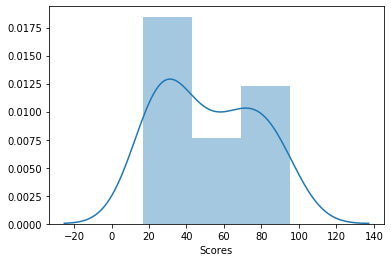

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(data['Scores'])
plt.show

#### there is almost no skewness in my target variable , so its good

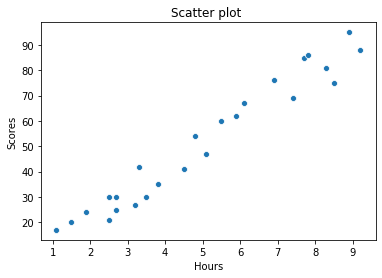

In [12]:
# plotting scatter plot
sns.scatterplot(x=data.Hours,y=data.Scores)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scatter plot ')
plt.show()

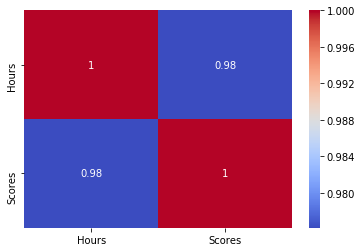

In [13]:
# we will plot heatmap of correlation matrix to show how number of hours depends upon Scores
cor=data.corr()
sns.heatmap(cor,annot=True,cmap='coolwarm')

#### Now every things looks good we have Hours feature which is highly correlated to target variable and also we dont have any null values in our data points so we are good to go for modelling 

Before modelling we must split our datapoints in train and test

In [14]:
from sklearn.model_selection import train_test_split
X=data.iloc[:,:1].values
Y=data.iloc[:, 1].values


In [15]:
# splitting my data in 80%  and 20% for train and test correpondingly
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=42)


#### so we have divided our total data points in 80% train  and 20% test 

### We will be using linearregression,lasso and ridge for modelling and MAE ,RMSE and r2 as our performance metric and at last we will we summarise the result of all three models

### Linear Regression

In [18]:
# we will use gridsearchcv for cross validation
# we will use linear regression for modellig
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
gs=GridSearchCV(lr,parameters)
gs.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [19]:
# printing best parameters
print(gs.best_params_)

{'copy_X': True, 'fit_intercept': False, 'normalize': True}


In [20]:
# training my model on best parameters
model=LinearRegression(copy_X=True,fit_intercept=False,normalize=True)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

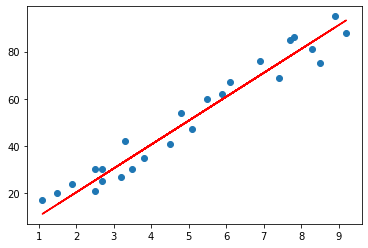

In [21]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line,color='r');
plt.show()

In [22]:
Y_pred=model.predict(X_test)

In [48]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})
df

,Actual,Predicted
0,81,84.132271
1,30,25.341045
2,21,25.341045
3,76,69.941285
4,62,59.804867


In [49]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))
print('Root mean squared error : ', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('r2 score : ',metrics.r2_score(y_test,Y_pred))

Mean Absolute Error: 4.077223680373289
Root mean squared error :  4.28691699632542
r2 score :  0.9687667278494497


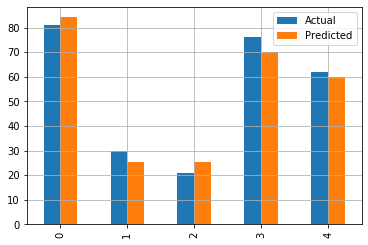

In [50]:
df.plot(kind='bar')
plt.grid()
plt.show()

### Lasso Regression

In [26]:
# Using lasso regression
from sklearn.linear_model import Lasso
ls=Lasso()
parameters={'alpha':[.01,.1,1,10,100],'fit_intercept':[True,False],'normalize':[True,False], 'copy_X':[True, False]}
gs=GridSearchCV(ls,parameters)
gs.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [27]:
# getting best parameters
gs.best_params_

{'alpha': 1, 'copy_X': True, 'fit_intercept': False, 'normalize': True}

In [28]:
# training lasso regression with best parametrs
model2=Lasso(alpha=1,copy_X=True,fit_intercept=False,normalize=True)
model2.fit(X_train,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

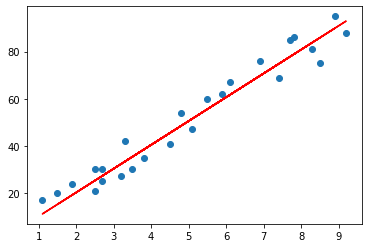

In [29]:
# Plotting the regression line
line = model2.coef_*X+model2.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line,color='r');
plt.show()

In [30]:
Y_pred2=model2.predict(X_test)

In [41]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted2': Y_pred2})
df2

,Actual,Predicted2
0,81,83.863323
1,30,25.260037
2,21,25.260037
3,76,69.717702
4,62,59.613687


In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred2))
print('Root mean squared error : ', np.sqrt(metrics.mean_squared_error(y_test, Y_pred2)))
print('r2 score : ',metrics.r2_score(y_test,Y_pred2))

Mean Absolute Error: 4.106386701662293
Root mean squared error :  4.335332483368603
r2 score :  0.9680572608066774


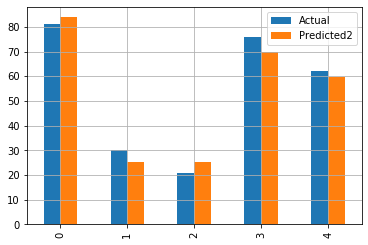

In [44]:
df2.plot(kind='bar')
plt.grid()
plt.show()

### Ridge Regression

In [33]:
# modelling using ridge regression
from sklearn.linear_model import Ridge
rdg=Ridge()
parameters={'alpha':[.01,.1,1,10,100],'fit_intercept':[True,False],'normalize':[True,False], 'copy_X':[True, False]}
gs=GridSearchCV(rdg,parameters)

In [34]:
gs.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
gs.best_params_

{'alpha': 10, 'copy_X': True, 'fit_intercept': False, 'normalize': True}

In [36]:
# fitting ridge regression with best parameters
model3=Ridge(alpha=10,copy_X=True,fit_intercept=False,normalize=True)
model3.fit(X_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=False, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

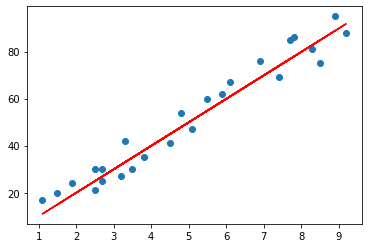

In [37]:
line = model3.coef_*X+model3.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line,color='r');
plt.show()

In [38]:
Y_pred3=model3.predict(X_test)

In [45]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted2': Y_pred3})
df3

,Actual,Predicted2
0,81,82.790919
1,30,24.937024
2,21,24.937024
3,76,68.826185
4,62,58.851376


In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred3))
print('Root mean squared error : ', np.sqrt(metrics.mean_squared_error(y_test, Y_pred3)))
print('r2 score : ',metrics.r2_score(y_test,Y_pred3))

Mean Absolute Error: 4.2226714709352375
Root mean squared error :  4.598232790789537
r2 score :  0.9640656954481779


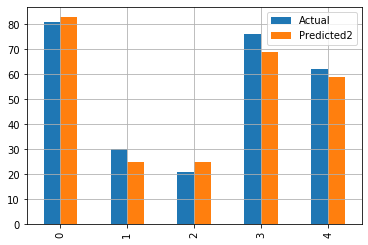

In [47]:
df3.plot(kind='bar')
plt.grid()
plt.show()

## Summary

In [60]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=["Model",'MAE','RMSE','R2']
x.add_row(['Linear Regression',4.07,4.28,0.9687])
x.add_row(['Lasso',4.106,4.33,0.9680])
x.add_row(['Ridge',4.22,4.59,0.964])
print(x)

+-------------------+-------+------+--------+
|       Model       |  MAE  | RMSE |   R2   |
+-------------------+-------+------+--------+
| Linear Regression |  4.07 | 4.28 | 0.9687 |
|       Lasso       | 4.106 | 4.33 | 0.968  |
|       Ridge       |  4.22 | 4.59 | 0.964  |
+-------------------+-------+------+--------+


#### So from this summary table we could see that our linear regression is best performing model with MAE of 4.07, RMSE of 4.28 and R2 of 0.9687

In [59]:
# predicting for Hours=9.25
hours=9.25
hours=(np.array(hours)).reshape(-1,1)
final_pred=model.predict(hours)
print('for Number of Hours = ', hours,' predicted Score = ',final_pred)

for Number of Hours =  [[9.25]]  predicted Score =  [93.76186773]
